# Лабораторная работа №2: эволюционные алгоритмы

##Постановка задачи

1. Найти оптимумы тестовых функций для оптимизации двумя алгоритмами библиотеки pygmo.

2. Решить нефункциональную (алгоритмическую) задачу алгоритмом библиотеки pygmo.

3. Визуализировать полученные результаты

## Источники

* [Документация pygmo](https://esa.github.io/pygmo2/)
* [Density and Contour Plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html)


# Подключение зависимостей

In [137]:
!pip install pygmo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [138]:
import pygmo as pg
import numpy as np
import matplotlib.pyplot as plt

# Инициализация тестовых функций

## Функция Изома
* Функция: $f(x,y) = -\cos \left(x\right)\cos \left(y\right) \exp\left(-\left(\left(x-\pi\right)^{2} + \left(y-\pi\right)^{2}\right)\right)$
* Глобальный минимум: $f(\pi , \pi) = -1$
* Границы поиска: $ -10\le x,y \le 10$

In [139]:
class Izom:
        
  @staticmethod
  def fitness(x: np.ndarray):
      return [-np.cos(x[0]) * np.cos(x[0]) * np.exp(-((x[0] - np.pi) ** 2 + (x[1] - np.pi) ** 2))]

  @staticmethod
  def get_bounds():
      return ([-10., -10.], [10., 10.])

  @staticmethod
  def get_glob_min():
      return np.array([np.pi, np.pi, -1])
  

## Функция Леви 13
* Функция: $f(x,y) = \sin^{2} 3\pi x + \left(x-1\right)^{2}\left(1+\sin^{2} 3\pi y\right)$
* Глобальный минимум: $f(1,1) = 0$
* Границы поиска: $-10\le x,y \le 10$

In [140]:
class Levi13:
        
  @staticmethod
  def fitness(x: np.ndarray):
      return [np.sin(3 * np.pi * x[0]) ** 2 + ((x[0] - 1) ** 2) * (np.sin(3 * np.pi * x[1]) ** 2) + ((x[1] - 1) ** 2) * (1 + np.sin(2 * np.pi * x[1]) ** 2)]

  @staticmethod
  def get_bounds():
      return ([-10., -10.], [10., 10.])
  
  @staticmethod
  def get_glob_min():
      return np.array([1, 1, 0])

# Графика

In [247]:
def draw_problem(prob, resolution: int = 1000):

  """ Визузуализация проблемы

  Args:
      prob (_type_): Проблема
      resolution (int, optional): Разрешение сетки. Defaults to 1000.
  """

  bounds = np.array(prob.get_bounds())
  fitness = prob.fitness
  glob_min = prob.get_glob_min()

  x = np.linspace(bounds[0, 0], bounds[1, 0], resolution)
  y = np.linspace(bounds[0, 1], bounds[1, 1], resolution)

  x_grid, y_grid = np.meshgrid(x, y)
  z_grid = fitness([x_grid, y_grid])[0]

  fig = plt.figure(figsize = (10, 10))
  ax = plt.axes()

  ax.set_title(type(prob).__name__)
  ax.legend(loc="upper left")
  ax.set_xlabel('x')
  ax.set_ylabel('y')

  plt.contour(x_grid, y_grid, z_grid, 20);
  ax.scatter(glob_min[0], glob_min[1], s=100, c="red", lw=1, ec='black', marker = 'o', label="Глобальный минимум")
  plt.colorbar();
  ax.legend()

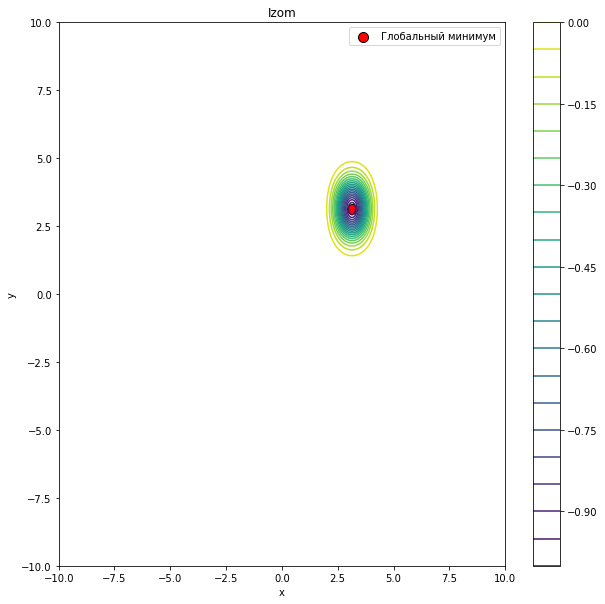

In [248]:
draw_problem(Izom())

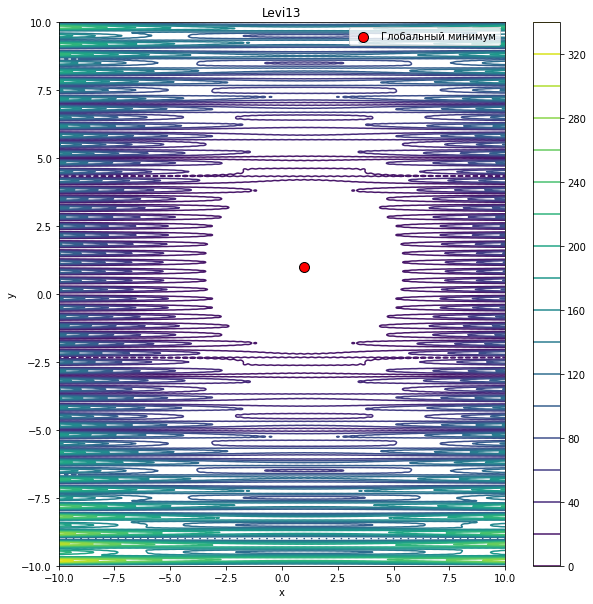

In [249]:
draw_problem(Levi13(), resolution=3000)

# Часть 1: поиск оптимумов тестовых функций 

In [159]:
def draw_optimization_process(prob, algo, pop_size: int = 100, gen_max_count: int = 100):

  """_summary_

  Args:
      prob (_type_): Проблема
      algo (_type_): Алгоритм оптимизации
      pop_size (int, optional): Размер популяций. Defaults to 100.
      gen_max_count (int, optional): Макс. кол-во поколений . Defaults to 100.

  Returns:
      _type_: кортеж из генов и результата лучшего представителя
  """

  pop = pg.population(prob, pop_size)

  fitness_list = []
  for i in range(gen_max_count):
      pop = algo.evolve(pop)
      fitness_list.append(pop.get_f()[pop.best_idx()])

  gens = np.linspace(0, gen_max_count, gen_max_count)
  fitness_list = np.array(fitness_list)

  fig = plt.figure(figsize = (10, 5))
  ax = plt.axes()

  ax.plot(gens, fitness_list, '-', marker = '.', label = "Результат чемпиона")
  ax.plot(gens, np.full(len(gens), prob.get_glob_min()[2]), '--', lw = 2, label = "Глобальный минимум")

  ax.set_title(type(prob).__name__)
  ax.set_xlabel("Generation")
  ax.set_ylabel("Fitness")
  ax.legend()

  return (pop.get_x()[pop.best_idx()], pop.get_f()[pop.best_idx()])

## Ход оптимизации через SGA 

(array([3.11956672, 3.15807246]), array([-0.99875886]))

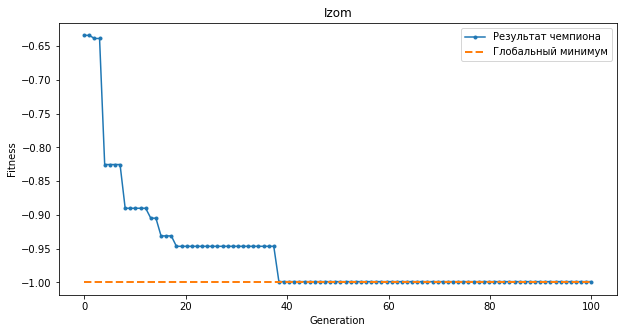

In [160]:
draw_optimization_process(Izom(), pg.algorithm(pg.sga(1)))

(array([1.3331125 , 1.00714044]), array([0.00055721]))

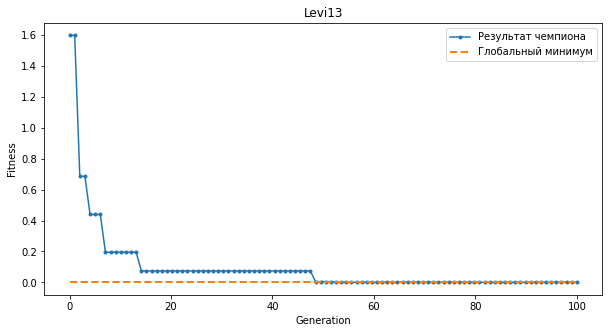

In [162]:
draw_optimization_process(Levi13(), pg.algorithm(pg.sga(1)))

## Ход оптимизации через Sade


(array([3.14159265, 3.14159265]), array([-1.]))

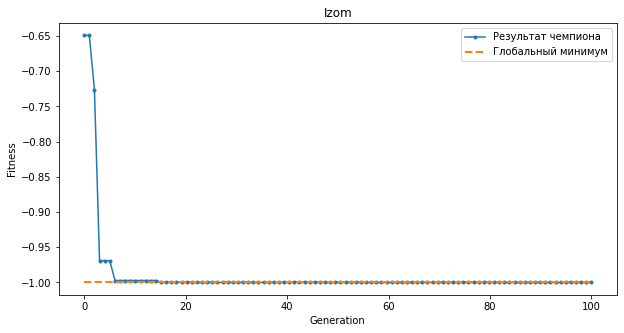

In [163]:
draw_optimization_process(Izom(), pg.algorithm(pg.sade(1)))

(array([0.99999992, 1.00000008]), array([6.47296506e-13]))

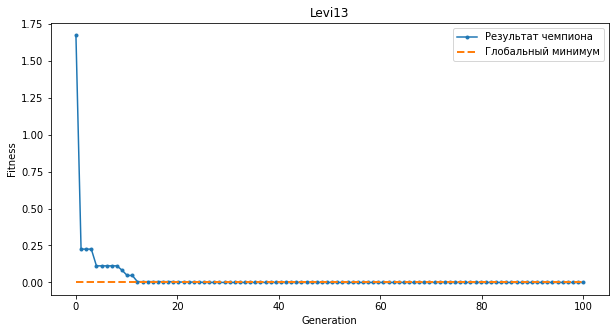

In [164]:
draw_optimization_process(Levi13(), pg.algorithm(pg.sade(1)))

# Часть 2: Нефункциональные (алгоритмические) задачи
Поиск глобального минимума по ландшавту яркости входного изображения

In [149]:
import cv2

(1214, 1250, 3)

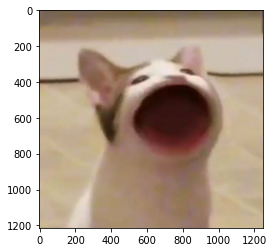

In [150]:
img = cv2.imread('./media/cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

(1214, 1250)

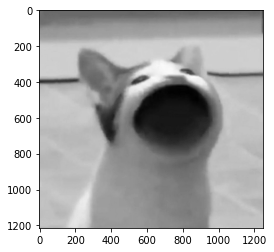

In [151]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap="gray")
img.shape

In [165]:
class Image:
    def __init__(self, img):
        self.img = img
        
    def fitness(self, x):
        return [self.img[int(x[0])][int(x[1])]]

    def get_bounds(self):
        return ([0, 0], [self.img.shape[0]-1, self.img.shape[1]-1])

    def get_glob_min(self):
      return np.array([1, 1, np.amin(img)])
      

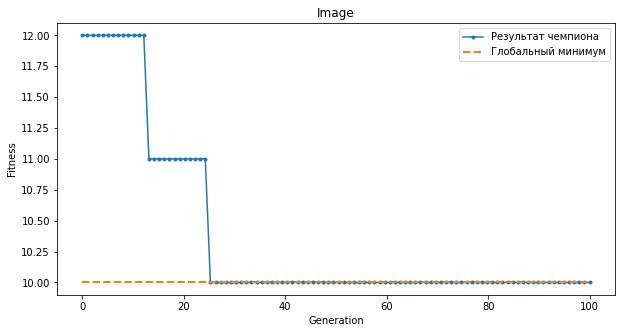

In [226]:
x, f = draw_optimization_process(Image(img), pg.algorithm(pg.sade(1)))

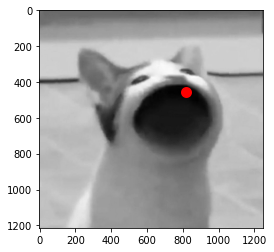

In [227]:
plt.imshow(img, cmap="gray")
plt.scatter(x[1], x[0], lw=5, c="red")